In [1]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('four-categories-dataset.csv')

In [3]:
data.head()

,Username,Profile name,Description,Recent Tweet,Recent 10 tweets,Recent 50 tweets,Recent 100 tweets,Tweets count,Favourites count,Followers count,Following count,Lists count,Created at,Category
0,plazapallas,Plaza Pallas Hotel,"Awarded for its service quality, Plaza Pallas ...","Our friends, if you wish to have an unforgetta...","Our friends, if you wish to have an unforgett...","Our friends, if you wish to have an unforgett...","Our friends, if you wish to have an unforgett...",270,0,380,54,3,2010-05-09 20:02:56,Tourism
1,letoHydra,Hotel Leto Hydra,Leto Hotel is distinguished for the 5 star ser...,I posted a new video to Facebook https://t.co/...,I posted a new video to Facebook https://t.co...,I posted a new video to Facebook https://t.co...,I posted a new video to Facebook https://t.co...,199,0,305,15,3,2013-03-20 18:41:12,Tourism
2,HotelKefalonia,Galaxy hotel kefal.,NaN,Κεφαλονιά: Εντυπωσιακό ρωμαϊκό ναυάγιο με χιλι...,Κεφαλονιά: Εντυπωσιακό ρωμαϊκό ναυάγιο με χιλ...,Κεφαλονιά: Εντυπωσιακό ρωμαϊκό ναυάγιο με χιλ...,Κεφαλονιά: Εντυπωσιακό ρωμαϊκό ναυάγιο με χιλ...,159,0,372,69,1,2013-02-06 16:33:36,Tourism
3,SiaravaHotel,Hotel Siarava,"Located next to the lake of Ioannina, the trad...",Επισκεφθείτε τα Γιάννενα την Άνοιξη!\n\n#hotel...,Επισκεφθείτε τα Γιάννενα την Άνοιξη!\n\n#hote...,Επισκεφθείτε τα Γιάννενα την Άνοιξη!\n\n#hote...,Επισκεφθείτε τα Γιάννενα την Άνοιξη!\n\n#hote...,119,283,213,263,8,2014-07-22 11:32:49,Tourism
4,VisitPeru,Visit Peru,Peru's official tourism account. Discover the ...,BEAUTIFUL! The jaguar or otorongo is the large...,Congratulations to our beautiful #Tumbes regi...,Congratulations to our beautiful #Tumbes regi...,Congratulations to our beautiful #Tumbes regi...,3643,493,68799,563,998,2009-02-02 20:57:00,Tourism


# Statistics
---

## All Nodes

In [20]:
data.describe().drop(['Favourites count', 'Lists count'], axis=1).apply(lambda s: s.apply('{0:.2f}'.format))

,Tweets count,Followers count,Following count
count,400.00,400.00,400.00
mean,12945.32,908503.25,3448.49
std,37114.79,7957341.56,30570.29
min,2.00,25.00,0.00
25%,882.00,1491.50,241.75
50%,4289.50,11231.50,686.00
75%,14002.25,80382.00,1612.00
max,464552.00,126732651.00,598439.00


## Tourism

In [26]:
data[data['Category'] == 'Tourism'].describe().drop(['Favourites count', 'Lists count'], axis=1).apply(lambda s: s.apply('{0:.2f}'.format))

,Tweets count,Followers count,Following count
count,100.00,100.00,100.00
mean,12403.11,81118.85,2328.90
std,21684.43,297048.03,4393.76
min,3.00,43.00,0.00
25%,420.00,971.00,445.50
50%,3216.50,3974.00,1048.00
75%,15449.00,46462.00,1877.50
max,109077.00,2791033.00,30773.00


## Education

In [27]:
data[data['Category'] == 'Education'].describe().drop(['Favourites count', 'Lists count'], axis=1).apply(lambda s: s.apply('{0:.2f}'.format))

,Tweets count,Followers count,Following count
count,100.00,100.00,100.00
mean,12275.98,128889.92,1305.61
std,10643.92,230183.29,2230.87
min,63.00,61.00,6.00
25%,1589.25,4418.25,259.25
50%,11356.00,35232.50,637.00
75%,19835.00,115013.75,1447.75
max,44150.00,1175996.00,17957.00


## Foodservice

In [28]:
data[data['Category'] == 'Foodservice'].describe().drop(['Favourites count', 'Lists count'], axis=1).apply(lambda s: s.apply('{0:.2f}'.format))

,Tweets count,Followers count,Following count
count,100.00,100.00,100.00
mean,19412.08,226429.97,3160.34
std,69069.35,1190708.91,12291.08
min,2.00,25.00,0.00
25%,660.50,789.75,202.75
50%,2733.50,2944.00,640.50
75%,7068.50,11542.00,2085.00
max,464552.00,10989283.00,93133.00


## Politics

In [29]:
data[data['Category'] == 'Politics'].describe().drop(['Favourites count', 'Lists count'], axis=1).apply(lambda s: s.apply('{0:.2f}'.format))

,Tweets count,Followers count,Following count
count,100.00,100.00,100.00
mean,7690.12,3197574.27,6999.10
std,11260.72,15702508.80,59769.68
min,13.00,301.00,0.00
25%,1614.50,8415.50,178.50
50%,4164.00,33665.50,429.50
75%,7910.75,247119.75,1220.25
max,76972.00,126732651.00,598439.00


# Word Frequencies
---

In [30]:
def clean_text(data):
    urls = r'http\S+'
    non_unicode_char = r'\W'
    numbers = r'[0-9_]'
    fix_whitespace = r'\s+'
    single_whitespace = ' '
    
    data = (data.replace([urls], single_whitespace, regex=True)
                    .replace([non_unicode_char, numbers], single_whitespace, regex=True)
                    .replace(fix_whitespace, single_whitespace, regex=True))
    data = data.apply(lambda s: s.lower() if type(s) == str else s)
    return data

nlp_el = spacy.load('el_core_news_md')
nlp_en = spacy.load('en_core_web_sm')
STOPWORDS = set(list(spacy.lang.en.STOP_WORDS) + list(spacy.lang.el.STOP_WORDS))

def remove_stopwords(row):
    row = [str(token) for token in nlp_el(row)]
    return [w for w in row if w not in STOPWORDS]

def tokenize_lemmatize(row):
    return [str(token.lemma_) for token in nlp_el(row)]

def tokenize_lemmatize_en(row):
    return [str(token.lemma_) for token in nlp_en(row)]

def remove_shortwords(row):
    row = [str(token) for token in nlp_el(row)]
    return [w for w in row if len(w) > 1]

In [31]:
data.replace(np.nan, '', inplace=True)
text_df = pd.DataFrame()
text_df['nd'] = clean_text(data['Profile name'] +' '+data['Description'])
text_df['t'] = clean_text(data['Recent 100 tweets'])

In [32]:
text_df['nd'] = text_df['nd'].apply(lambda row: tokenize_lemmatize(row))
text_df['nd'] = text_df['nd'].apply(lambda row: ' '.join(row))
text_df['nd'] = text_df['nd'].apply(lambda row: tokenize_lemmatize_en(row))
text_df['nd'] = text_df['nd'].apply(lambda row: ' '.join(row))
text_df['nd'] = text_df['nd'].apply(lambda row: remove_stopwords(row))
text_df['nd'] = text_df['nd'].apply(lambda row: ' '.join(row))
text_df['nd'] = text_df['nd'].apply(lambda row: remove_shortwords(row))
text_df['nd'] = text_df['nd'].apply(lambda row: ' '.join(row))

text_df['t'] = text_df['t'].apply(lambda row: tokenize_lemmatize(row))
text_df['t'] = text_df['t'].apply(lambda row: ' '.join(row))
text_df['t'] = text_df['t'].apply(lambda row: tokenize_lemmatize_en(row))
text_df['t'] = text_df['t'].apply(lambda row: ' '.join(row))
text_df['t'] = text_df['t'].apply(lambda row: remove_stopwords(row))
text_df['t'] = text_df['t'].apply(lambda row: ' '.join(row))
text_df['t'] = text_df['t'].apply(lambda row: remove_shortwords(row))
text_df['t'] = text_df['t'].apply(lambda row: ' '.join(row))

In [33]:
text_df['Category'] = data['Category']

Text(0.5, 1.0, 'Education')

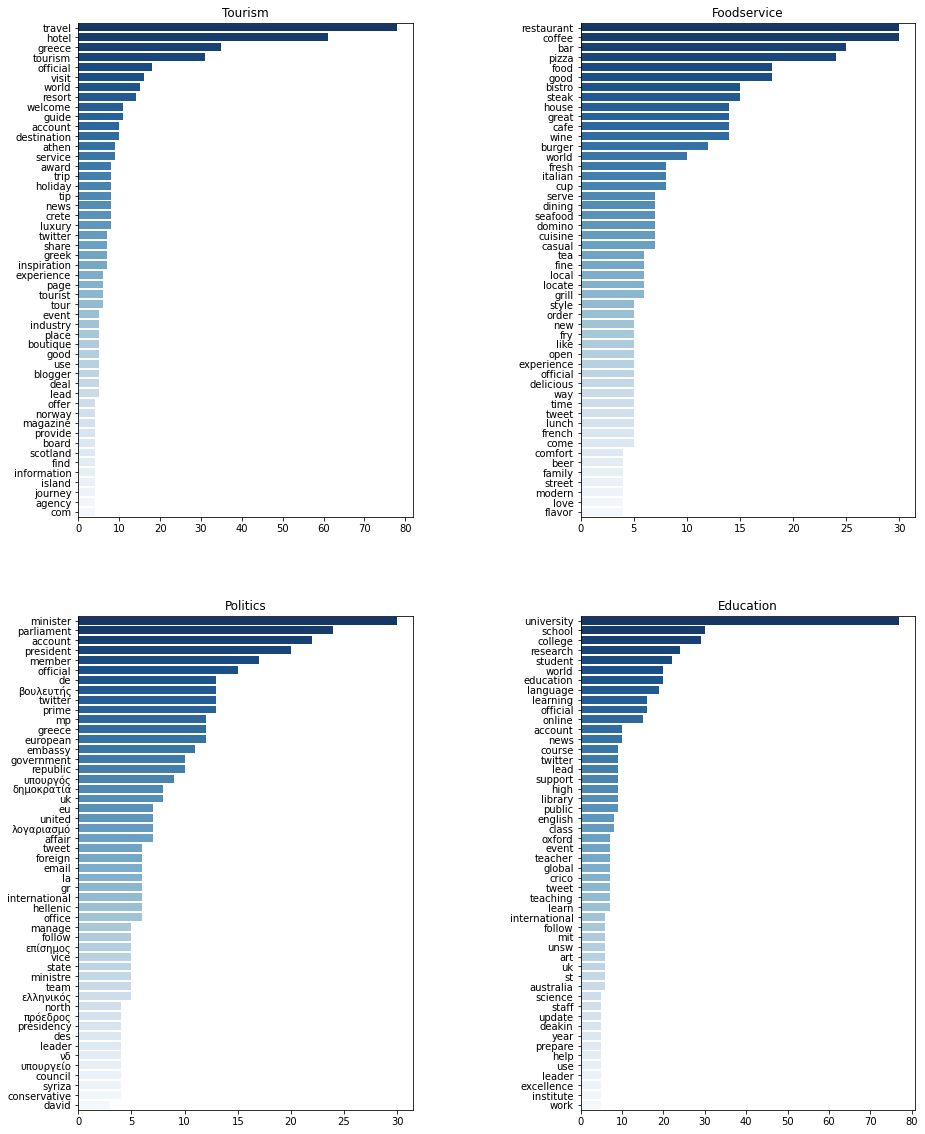

In [49]:
tourism_words = pd.Series(' '.join(text_df[text_df.Category == 'Tourism'].nd).split()).value_counts()
foodservice_words = pd.Series(' '.join(text_df[text_df.Category == 'Foodservice'].nd).split()).value_counts()
politics_words = pd.Series(' '.join(text_df[text_df.Category == 'Politics'].nd).split()).value_counts()
education_words = pd.Series(' '.join(text_df[text_df.Category == 'Education'].nd).split()).value_counts()

fig, axs = plt.subplots(2,2,figsize =(15,20))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5)

sns.barplot(y=tourism_words[:50].index, x=tourism_words[:50], orient='h', ax = axs[0,0], palette="Blues_r")
axs[0,0].set_title('Tourism')

sns.barplot(y=foodservice_words[:50].index, x=foodservice_words[:50], orient='h', ax = axs[0,1], palette="Blues_r")
axs[0,1].set_title('Foodservice')

sns.barplot(y=politics_words[:50].index, x=politics_words[:50], orient='h', ax = axs[1,0], palette="Blues_r")
axs[1,0].set_title('Politics')

sns.barplot(y=education_words[:50].index, x=education_words[:50], orient='h', ax = axs[1,1], palette="Blues_r")
axs[1,1].set_title('Education')

Text(0.5, 1.0, 'Education')

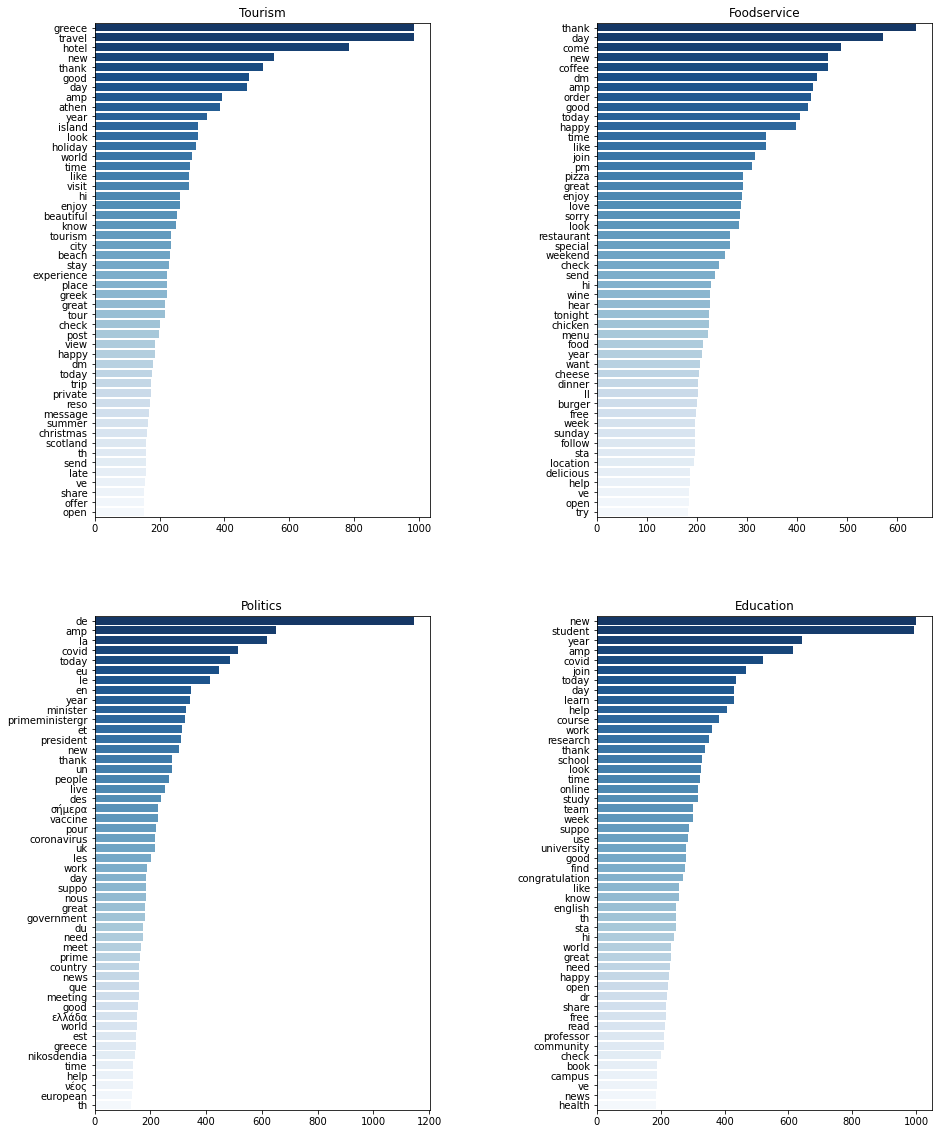

In [50]:
text_df['t'] = text_df['t'].replace('rt\s', ' ', regex=True)
tourism_words = pd.Series(' '.join(text_df[text_df.Category == 'Tourism'].t).split()).value_counts()
foodservice_words = pd.Series(' '.join(text_df[text_df.Category == 'Foodservice'].t).split()).value_counts()
politics_words = pd.Series(' '.join(text_df[text_df.Category == 'Politics'].t).split()).value_counts()
education_words = pd.Series(' '.join(text_df[text_df.Category == 'Education'].t).split()).value_counts()

fig, axs = plt.subplots(2,2,figsize =(15,20))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5)

sns.barplot(y=tourism_words[:50].index, x=tourism_words[:50], orient='h', ax = axs[0,0], palette="Blues_r")
axs[0,0].set_title('Tourism')

sns.barplot(y=foodservice_words[:50].index, x=foodservice_words[:50], orient='h', ax = axs[0,1], palette="Blues_r")
axs[0,1].set_title('Foodservice')

sns.barplot(y=politics_words[:50].index, x=politics_words[:50], orient='h', ax = axs[1,0], palette="Blues_r")
axs[1,0].set_title('Politics')

sns.barplot(y=education_words[:50].index, x=education_words[:50], orient='h', ax = axs[1,1], palette="Blues_r")
axs[1,1].set_title('Education')

# Train - Test split

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test  = train_test_split(data, test_size=0.25, random_state=42, stratify=data.Category)

In [61]:
X_train.to_csv('four-categories-training-set.csv', index=False)
X_test.to_csv('four-categories-validation-set.csv', index=False)